In [5]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

In [6]:
EVAL_JSON_PATH = './checkpoints/eval_json/'
MODE = ['e2e', 'frozen']
DATA_SIZE = ['2000', '160', '80', '40', '20', '10']
NAME = {"IoU":"Jaccard Index", "Dice":"Dice Score", "Acc":"Accuracy"}

In [ ]:
eval_info = dict()

for m in MODE:
    for ds in DATA_SIZE:
        json_name = f'seg_{m}_{ds}.json'
        json_path = os.path.join(EVAL_JSON_PATH, json_name)

        print(f"Loading: {json_path}")

        with open(json_path, 'r') as f:
            eval_info[(m, ds)] = json.load(f)

Loading: ./checkpoints/eval_json/seg_e2e_2000.json
Loading: ./checkpoints/eval_json/seg_e2e_160.json
Loading: ./checkpoints/eval_json/seg_e2e_80.json
Loading: ./checkpoints/eval_json/seg_e2e_40.json
Loading: ./checkpoints/eval_json/seg_e2e_20.json
Loading: ./checkpoints/eval_json/seg_e2e_10.json
Loading: ./checkpoints/eval_json/seg_frozen_2000.json
Loading: ./checkpoints/eval_json/seg_frozen_160.json
Loading: ./checkpoints/eval_json/seg_frozen_80.json
Loading: ./checkpoints/eval_json/seg_frozen_40.json
Loading: ./checkpoints/eval_json/seg_frozen_20.json
Loading: ./checkpoints/eval_json/seg_frozen_10.json


In [53]:
def compare_metrics(key, y_min, y_max):
    '''
    key: "IoU", "Dice", "Acc"
    '''
    score_s = dict()
    for m in MODE:
        score_s[m] = []
        for ds in DATA_SIZE:
            cur_info = eval_info[(m, ds)]
            score_s[m].append(sum(cur_info[key])/len(cur_info[key]))

    N = len(score_s[MODE[0]])
    x = np.arange(N) * 4
    width = 1.5

    fig, ax = plt.subplots()
    bars1 = ax.bar(x - width/2 - 0.1, score_s[MODE[0]], width, label='Frozen Pretrained', color='skyblue')
    bars2 = ax.bar(x + width/2 + 0.1, score_s[MODE[1]], width, label='End to End', color='orange')

    ax.set_xticks(x)
    ax.set_xticklabels(DATA_SIZE)

    for bar in bars1:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.3f}'[1:], ha='center', va='bottom')

    for bar in bars2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.3f}'[1:], ha='center', va='bottom')

    ax.legend()
    ax.set_ylabel(NAME[key])
    ax.set_xlabel("Training Data Size")
    ax.set_ybound(lower=y_min, upper=y_max)

    plt.tight_layout()
    # plt.savefig('grouped_bar.png', dpi=300)
    plt.show()

## Jaccard index

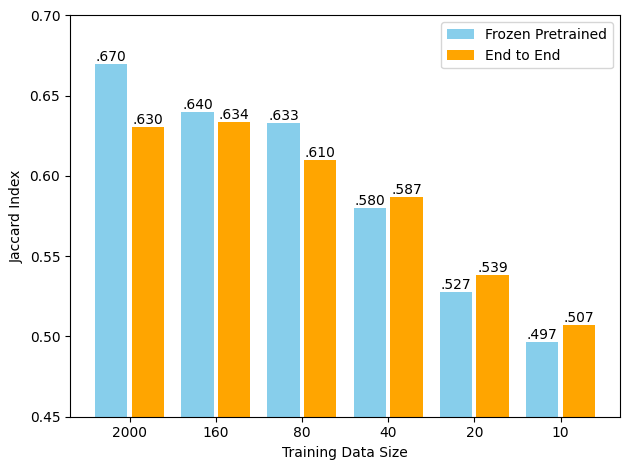

In [56]:
compare_metrics(key='IoU', y_min=0.45, y_max=0.7)

## Dice Score

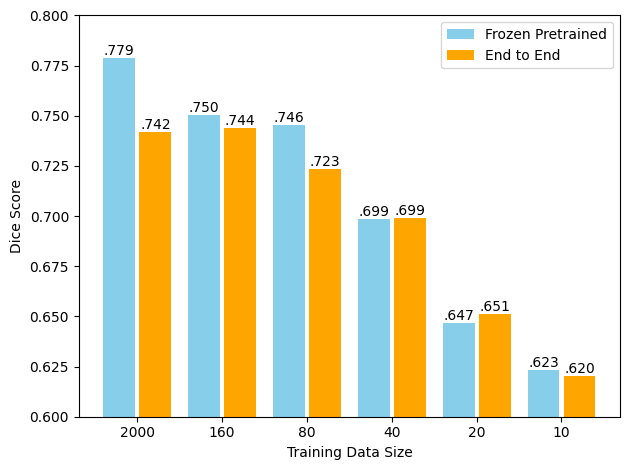

In [57]:
compare_metrics(key='Dice', y_min=0.6, y_max=0.8)

## Accuracy

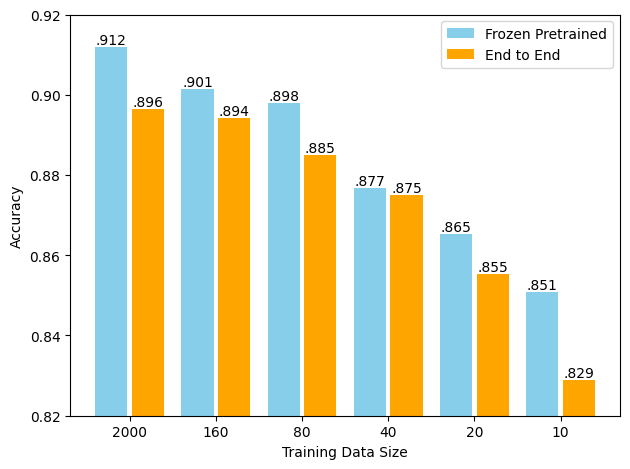

In [58]:
compare_metrics(key='Acc', y_max=0.92, y_min=0.82)